<a href="https://colab.research.google.com/github/dianamueses/MachineLearning_LAB/blob/main/Week_8_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [1]:
import warnings
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/ColabTrial/bank-additional-full.csv", sep = ";")

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job", "marital", "housing", "contact", "day_of_week", "campaign", "month", "education"], drop_first = True)

In [7]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

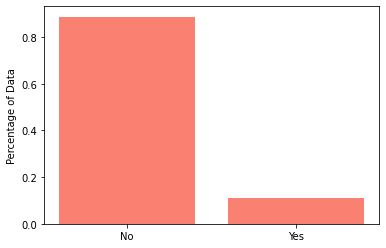

In [9]:
obs = len(y)
plt.bar(["No", "Yes"],[len(y[y.yes == 0])/obs, len(y[y.yes == 1])/obs], color = 'salmon')
plt.ylabel("Percentage of Data")
plt.show()

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [11]:
###############
###TRANSFORM###
###############

from imblearn.over_sampling import RandomOverSampler, SMOTE

# We implement ROS and SMOTE to see which one performs best:

# ROS = Random Over Sample
ros = RandomOverSampler(random_state = 0)
over_X, over_y = ros.fit_resample(X_scaled, y_train)

# SMOTE
oversample = SMOTE()
smote_x, smote_y = oversample.fit_resample(X_scaled, y_train)

# Models
over_log = LogisticRegression(max_iter=10000).fit(over_X, over_y)
smote_log = LogisticRegression(max_iter=10000).fit(smote_x, smote_y)

In [12]:
# Make predictions on the testing data
y_pred_over = over_log.predict(X_test)

# Evaluate the performance of the model
acc = accuracy_score(y_test, y_pred_over)

print("Accuracy of ROS:", acc)

# Make predictions on the testing data
y_pred_smote = smote_log.predict(X_test)

# Evaluate the performance of the model
acc = accuracy_score(y_test, y_pred_smote)

print("Accuracy of SMOTE:", acc)

Accuracy of ROS: 0.836287124706644
Accuracy of SMOTE: 0.8375819373634378


In [13]:
# The accuracy of both methods is very similar, thus we choose SMOTE
X_scaled, y_train = oversample.fit_resample(X_scaled, y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [14]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

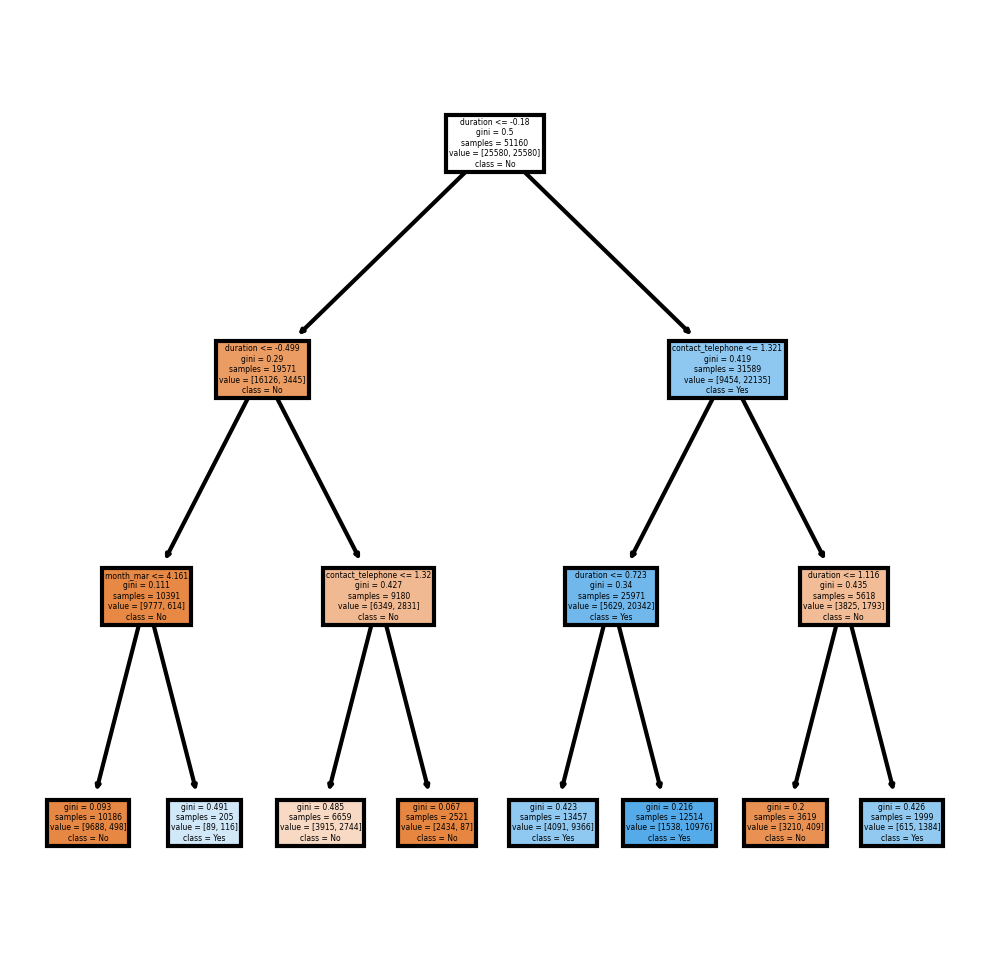

In [16]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])
plt.show()
               
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [17]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

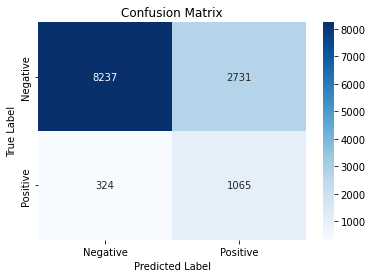

In [18]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [19]:
dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)


bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7522861535971515


In [20]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

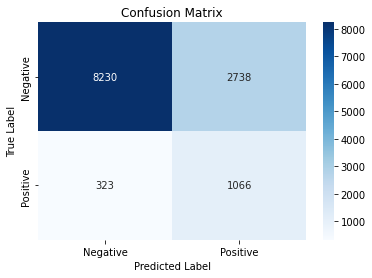

In [21]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [22]:
from sklearn.ensemble import AdaBoostClassifier

In [23]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)

In [24]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

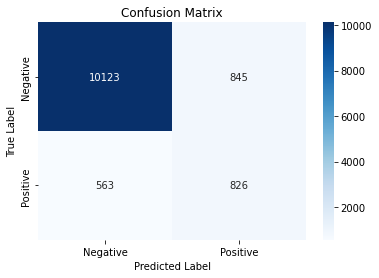

In [25]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap = 'Blues', xticklabels = class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

We significantly reduced number of false positives.

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [28]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 KB 5.2 MB/s eta 0:00:00


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import ElasticNet
from mlens.ensemble import SuperLearner

In [33]:
### SET YOUR BASE LEARNERS

base_estimators = [
    LogisticRegression(),
    RandomForestClassifier(),
    KNeighborsClassifier(n_neighbors = 4),
    ElasticNet(),
    AdaBoostRegressor()
]
super_learner = SuperLearner()
super_learner.add(base_estimators)

### FIT TO TRAINING DATA
super_learner.fit(X_scaled, y_train)

### GET base_predictions
base_predictions = super_learner.predict(X_scaled)


In [32]:
### TRAIN YOUR METALEARNER

In [35]:
log_reg = LogisticRegression(fit_intercept = False).fit(base_predictions, y_train)
y_pred = log_reg.predict(super_learner.predict(X_test))

In [36]:
### INTERPRET COEFFICIENTS

In [37]:
log_reg.coef_

array([[ -1.82353599, -12.70501491,   1.68951268,   0.5374019 ,
         13.01308044]])

The coefficients represent the estimates for each model in the following order: logistic regression, random forest, K-neighbors, elastic net and ada boost. Given the estimates of the log_reg coefficients and the base estimator coefficients, the result of the logistic regression will be the sum of the product of each log_reg estimate and the base estimators'. Thus, we can infer from our logistic regression coefficients that the ada boost model has a significant positive weight, while random forest exhibits the same behavior in the opposite direction.

In [41]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
y_true = y_test
cm_super = confusion_matrix(y_true, y_pred)

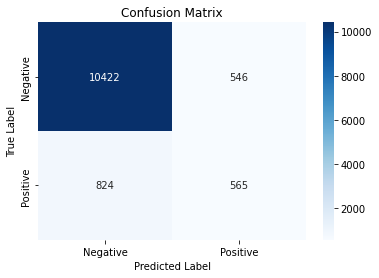

In [43]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
fig = plt.figure()
sns.heatmap(cm_super, annot=True, fmt='d', cmap = 'Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [44]:
fig.savefig('imagename.png')

The number of false positives and false negatives is 1,370, which is lower than our previous estimates. Our last model predicted 1,408 false positives and negatives.

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities (Out of Sample)

Sensitivity is calculated as the number of correct positive predictions (TP) divided by the total number of positives (P). Specificity is calculated as the number of correct negative predictions (TN) divided by the total number of negatives (N).

In [52]:
def sensitivity(x):
  return x[1,1] / (x[1,0] + x[1,1])

def specificity(x):
  return x[0,0] / (x[0,0] + x[0,1])

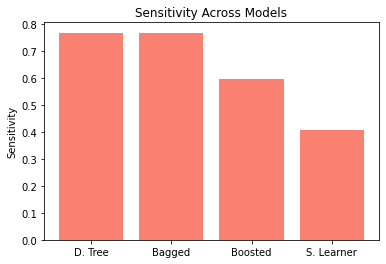

In [54]:
plt.title('Sensitivity Across Models')
plt.bar(['D. Tree', 'Bagged', 'Boosted', 'S. Learner'], 
        [sensitivity(cm_raw), sensitivity(cm_bag), sensitivity(cm_boost), sensitivity(cm_super)],
        color = 'salmon')
plt.ylabel('Sensitivity')
plt.show()

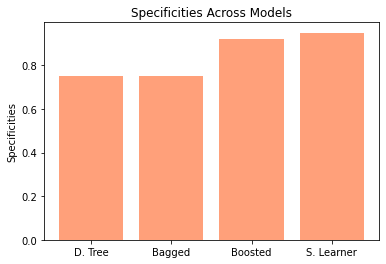

In [57]:
plt.title('Specificities Across Models')
plt.bar(['D. Tree', 'Bagged', 'Boosted', 'S. Learner'], 
        [specificity(cm_raw), specificity(cm_bag), specificity(cm_boost), specificity(cm_super)],
        color = 'lightsalmon')
plt.ylabel('Specificities')
plt.show()